# Preprocessing

In [1]:
%reset -f
# read & manipulate data
import pandas as pd
import numpy as np
import tensorflow as tf

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
import pylab as plt
# %matplotlib notebook

# misc
import random as rn

In [2]:
# load the dataset
df = pd.read_csv('https://github.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/raw/master/creditcard.csv',sep=',')

In [3]:
# set seeds for reproducibility
# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = 200000
VALIDATE_SIZE = 0.2
# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED) #

# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = 200000
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED) #

In [4]:
# let's quickly convert the columns to lower case and rename the Class column
# so as to not cause syntax errors
df.columns = map(str.lower, df.columns)
df.rename(columns={'class': 'label'}, inplace=True)

# print first 5 rows to get an initial impression of the data we're dealing with
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# add a negligible amount to avoid taking the log of 0
df['log10_amount'] = np.log10(df.amount + 0.00001)

In [6]:
# keep the label field at the back
df = df[
    [col for col in df if col not in ['label', 'log10_amount']] +
    ['log10_amount', 'label']
]

In [ ]:
df

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,log10_amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,2.174990,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.429754,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,2.578249,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,2.091667,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.845036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,-0.113504,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,1.394277,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,1.831742,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,1.000000,0


# Anomaly Detection with Auto-Encoder


The idea is quite straightforward:
1. Due to the **bottleneck architecture** of the neural network, it is forced to learn a **condensed representation** from which to reproduce the original input.
2. We feed it **only normal transactions**, which it will learn to reproduce with high fidelity.
3. As a consequence, if a **fraud transaction is sufficiently distinct** from normal transactions, the auto-encoder will have trouble reproducing it with its learned weights, and the subsequent **reconstruction loss will be high**.
4. Anything above a specific loss (treshold) will be **flagged as anomalous** and thus labeled as fraud.

## t-SNE stuff


In plain English, most certainly oversimplifying matters: **t-SNE is a dimensionality reduction technique used for visualisations** of complex datasets.
It **maps clusters in high-dimensional data** to **a two- or three dimensional plane** so we can get an idea of how easy it will be to **discriminate between classes**.
It does this by trying to keep the distance between data points in lower dimensions proportional to the probability that these data points are neighbours in the higher dimensions.

A more elaborate [introduction](https://www.datacamp.com/community/tutorials/introduction-t-sne) is available on DataCamp.

For academic detailed explanation please go to: L.J.P. van der Maaten and G.E. Hinton. **Visualizing High-Dimensional Data Using t-SNE.** Journal of Machine Learning Research 9(Nov):2579-2605, 2008. https://lvdmaaten.github.io/tsne/


**Undersampling the non-fraud**

To keep the computation time low, let's feed t-SNE only a small subsample (undersampling the clean transactions).

In [7]:
# manual parameter
RATIO_TO_FRAUD = 15

# dropping redundant columns
df = df.drop(['time', 'amount'], axis=1)

# splitting by class
fraud = df[df.label == 1]
clean = df[df.label == 0]

# undersample clean transactions
clean_undersampled = clean.sample(
    int(len(fraud) * RATIO_TO_FRAUD),
    random_state=RANDOM_SEED
)

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([fraud, clean_undersampled])
column_names = list(visualisation_initial.drop('label', axis=1).columns)

# isolate features from labels
features, labels = visualisation_initial.drop('label', axis=1).values, \
                   visualisation_initial.label.values

print(f"""The non-fraud dataset has been undersampled from {len(clean):,} to {len(clean_undersampled):,}.
This represents a ratio of {RATIO_TO_FRAUD}:1 to fraud.""")

The non-fraud dataset has been undersampled from 284,315 to 7,380.
This represents a ratio of 15:1 to fraud.


Now apply t-SNE (t-Distributed Stochastic Neighbor Embedding).

Do 2D t-SNE first

In [8]:
from sklearn.manifold import TSNE
# A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely)
# how to balance attention between local and global aspects of your data. The parameter is,
# in a sense, a guess about the number of close neighbors each point has. The perplexity
# value has a complex effect on the resulting pictures.

# tsne = TSNE(n_components=2, perplexity=30)
tsne = TSNE(n_components=2, perplexity=50)
features_embedded = tsne.fit_transform(features)

In [ ]:
#
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=features_embedded[np.where(labels==1)][:,0],
                         y=features_embedded[np.where(labels==1)][:,1],
                        mode='markers',
                        name='Fraud'))
fig.add_trace(go.Scatter(x=features_embedded[np.where(labels==0)][:,0],
                         y=features_embedded[np.where(labels==0)][:,1],
                        mode='markers',
                        name='No Fraud'))
fig.show()

Now 3D t-SNE

In [ ]:
from sklearn.manifold import TSNE

# A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely)
# how to balance attention between local and global aspects of your data. The parameter is,
# in a sense, a guess about the number of close neighbors each point has. The perplexity
# value has a complex effect on the resulting pictures.

tsne = TSNE(n_components=3, perplexity=50)  # Perperxity is related to the number of ne
features_embedded = tsne.fit_transform(features)

import plotly.express as px
import plotly.graph_objects as go
fig3d = go.Figure()
fig3d.add_trace(go.Scatter3d(x=features_embedded[np.where(labels==1)][:,0], y=features_embedded[np.where(labels==1)][:,1],z=features_embedded[np.where(labels==1)][:,2],mode='markers',name='Fraud'))
fig3d.add_trace(go.Scatter3d(x=features_embedded[np.where(labels==0)][:,0], y=features_embedded[np.where(labels==0)][:,1],z=features_embedded[np.where(labels==1)][:,2],mode='markers',name='No Fraud'))
fig3d.show()

## Autoencoder Fraud Detection

<a id="4"></a> <br>
**Train/Validate/Test split**


Our auto-encoder will **only train on transactions that were normal**.
What's left over will be combined with the fraud set to form our test sample.

We will be doing something akin to the below:

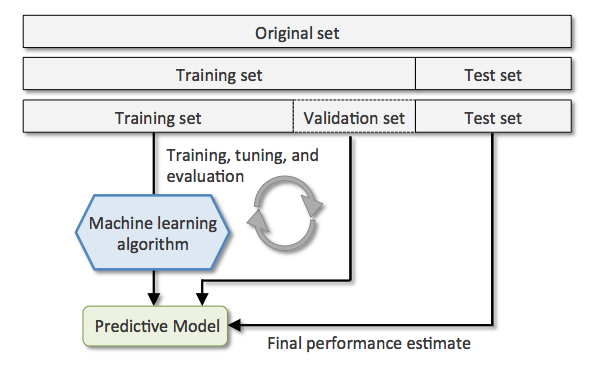


1. Training: only non-fraud
    * Split into:
        1. Actual training of our autoencoder
        2. Validation of the neural network's ability to generalize
2. Testing : mix of fraud and non-fraud
    * Treated like new data
    * Attempt to locate outliers
        1. Compute reconstruction loss
        2. Apply threshold

**Shuffle the samples**

Fist we will shuffle the samples using the command `DataFrame.sample(frac=1)`. But first we will separate the Fraud samples as we don't want them to be part of our training.

In [ ]:
# Split Fraud and Clean

# splitting by class
fraud = df[df.label == 1]
clean = df[df.label == 0]

Data_Fraud_df=fraud.drop(['label'], axis=1)
Data_Clean_df=clean.drop(['label'], axis=1)

# Shuffle the samples before split
Data_Clean_df=Data_Clean_df.sample(frac=1)
# Convert into array
Data_Clean=Data_Clean_df.values
Data_Fraud=Data_Fraud_df.values

In [ ]:
# Split Clean into test, val, and train
n_samples,n_variables=Data_Clean.shape;
train_samples=int(n_samples*.6)
val_samples=int(n_samples*.3)

Data_train=Data_Clean[:train_samples];
Data_val=Data_Clean[train_samples:train_samples+val_samples];
Data_test=Data_Clean[train_samples+val_samples:];

### Now build the Autoencoder!!
(with bottleneck dimension=3)

**Import the Package**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

**Define Autoencoder**

In [ ]:
x_train=Data_train; x_val=Data_val; x_test=Data_test;

n_samples,n_features=np.shape(x_train);
bottleneck_size =3;
# cone=[512,128,64];
cone=[16,8,4];

input_img = Input(shape=(n_features,))

encoded = Dense(cone[0], activation='relu')(input_img)
encoded = Dense(cone[1], activation='relu')(encoded)
encoded = Dense(cone[2], activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)


encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(cone[2], activation='relu')(encoded_input)
decoded = Dense(cone[1], activation='relu')(decoded)
decoded = Dense(cone[0], activation='relu')(decoded)
decoded = Dense(n_features, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')

**Training Autoencoder**

In [ ]:
AE_Training_History=ae.fit(x_train, x_train,
    epochs = 10,
    batch_size=256,
    validation_data=(x_val, x_val))

save_model=False
if save_model:
    ae.save('model.h5')
    encoder.save('encoder.h5')
    decoder.save('decoder.h5')

Epoch 1/10
667/667 [==============================] - 5s 6ms/step - loss: 363705440.0000 - val_loss: 361139232.0000
Epoch 2/10
667/667 [==============================] - 2s 3ms/step - loss: 363705504.0000 - val_loss: 361139232.0000
Epoch 3/10
667/667 [==============================] - 2s 3ms/step - loss: 363705504.0000 - val_loss: 361139232.0000
Epoch 4/10
667/667 [==============================] - 2s 3ms/step - loss: 363705664.0000 - val_loss: 361139232.0000
Epoch 5/10
667/667 [==============================] - 2s 3ms/step - loss: 363705376.0000 - val_loss: 361139232.0000
Epoch 6/10
667/667 [==============================] - 3s 4ms/step - loss: 363705504.0000 - val_loss: 361139232.0000
Epoch 7/10
667/667 [==============================] - 3s 4ms/step - loss: 363705760.0000 - val_loss: 361139232.0000
Epoch 8/10
667/667 [==============================] - 2s 3ms/step - loss: 363705664.0000 - val_loss: 361139232.0000
Epoch 9/10
667/667 [==============================] - 2s 3ms/step - loss

**Run Autoencoder Over Test Set**

In [ ]:

x_comp=np.concatenate((x_test,Data_Fraud),axis=0)
y_comp=np.concatenate((np.zeros([len(x_test[:,0]),]),np.ones([len(Data_Fraud[:,0]),])),axis=0)

encoded_data = encoder.predict(x_comp)
decoded_data = decoder.predict(encoded_data)

904/904 [==============================] - 1s 1ms/step


**Training Statistics**

dict_keys(['loss', 'val_loss'])


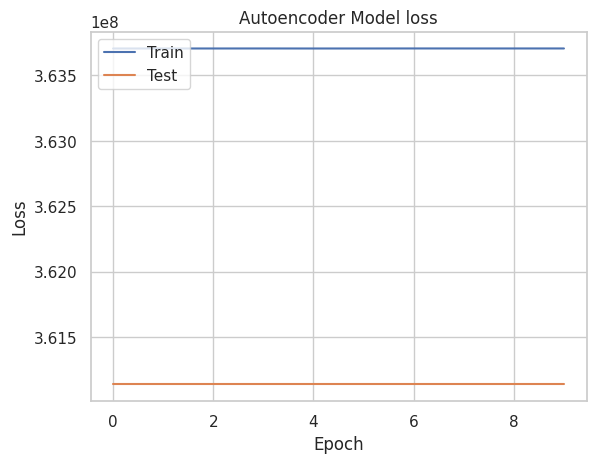

In [ ]:
# list all data in history
print(AE_Training_History.history.keys())
# visualization of the loss minimization during the training process
plt.plot(AE_Training_History.history['loss'])
plt.plot(AE_Training_History.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Latent Space Representation**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_comp))):
    if bottleneck_size==2:
        fig.add_trace(go.Scatter(x=encoded_data[np.where(y_comp==i)][:,0], y=encoded_data[np.where(y_comp==i)][:,1],mode='markers',name=str(i)))
    else:
        fig.add_trace(go.Scatter3d(x=encoded_data[np.where(y_comp==i)][:,0], y=encoded_data[np.where(y_comp==i)][:,1],z=encoded_data[np.where(y_comp==i)][:,2],mode='markers',name=str(i)))


fig.show()

Now same thing but with 2D latent space

In [ ]:
%reset -f

In [ ]:
# Split Fraud and Clean

# splitting by class
fraud = df[df.label == 1]
clean = df[df.label == 0]

Data_Fraud_df=fraud.drop(['label'], axis=1)
Data_Clean_df=clean.drop(['label'], axis=1)

# Shuffle the samples before split
Data_Clean_df=Data_Clean_df.sample(frac=1)
# Convert into array
Data_Clean=Data_Clean_df.values
Data_Fraud=Data_Fraud_df.values

In [ ]:
# Split Clean into test, val, and train
n_samples,n_variables=Data_Clean.shape;
train_samples=int(n_samples*.6)
val_samples=int(n_samples*.3)

Data_train=Data_Clean[:train_samples];
Data_val=Data_Clean[train_samples:train_samples+val_samples];
Data_test=Data_Clean[train_samples+val_samples:];

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
# Define autoencoder
x_train=Data_train; x_val=Data_val; x_test=Data_test;

n_samples,n_features=np.shape(x_train);
bottleneck_size =2;
# cone=[512,128,64];
cone=[16,8,4];

input_img = Input(shape=(n_features,))

encoded = Dense(cone[0], activation='relu')(input_img)
encoded = Dense(cone[1], activation='relu')(encoded)
encoded = Dense(cone[2], activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)


encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(cone[2], activation='relu')(encoded_input)
decoded = Dense(cone[1], activation='relu')(decoded)
decoded = Dense(cone[0], activation='relu')(decoded)
decoded = Dense(n_features, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train autoencoder

AE_Training_History=ae.fit(x_train, x_train,
    epochs = 10,
    batch_size=256,
    validation_data=(x_val, x_val))

save_model=False
if save_model:
    ae.save('model.h5')
    encoder.save('encoder.h5')
    decoder.save('decoder.h5')

Epoch 1/10
667/667 [==============================] - 4s 4ms/step - loss: 363705440.0000 - val_loss: 361139232.0000
Epoch 2/10
667/667 [==============================] - 2s 3ms/step - loss: 363705504.0000 - val_loss: 361139232.0000
Epoch 3/10
667/667 [==============================] - 2s 3ms/step - loss: 363705504.0000 - val_loss: 361139232.0000
Epoch 4/10
667/667 [==============================] - 3s 5ms/step - loss: 363705664.0000 - val_loss: 361139232.0000
Epoch 5/10
667/667 [==============================] - 2s 3ms/step - loss: 363705376.0000 - val_loss: 361139232.0000
Epoch 6/10
667/667 [==============================] - 2s 3ms/step - loss: 363705504.0000 - val_loss: 361139232.0000
Epoch 7/10
667/667 [==============================] - 2s 3ms/step - loss: 363705760.0000 - val_loss: 361139232.0000
Epoch 8/10
667/667 [==============================] - 2s 3ms/step - loss: 363705664.0000 - val_loss: 361139232.0000
Epoch 9/10
667/667 [==============================] - 3s 4ms/step - loss

In [ ]:
# Run autoencoder over test set
x_comp=np.concatenate((x_test,Data_Fraud),axis=0)
y_comp=np.concatenate((np.zeros([len(x_test[:,0]),]),np.ones([len(Data_Fraud[:,0]),])),axis=0)

encoded_data = encoder.predict(x_comp)
decoded_data = decoder.predict(encoded_data)

904/904 [==============================] - 1s 1ms/step


dict_keys(['loss', 'val_loss'])


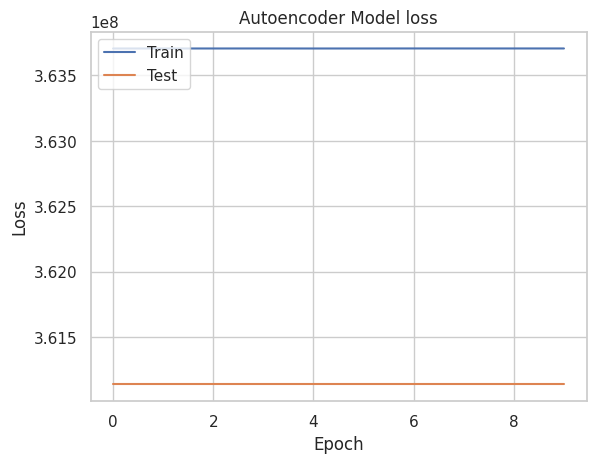

In [ ]:
# Training statistics
# list all data in history
print(AE_Training_History.history.keys())
# visualization of the loss minimization during the training process
plt.plot(AE_Training_History.history['loss'])
plt.plot(AE_Training_History.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Latent space representation
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_comp))):
    if bottleneck_size==2:
        fig.add_trace(go.Scatter(x=encoded_data[np.where(y_comp==i)][:,0], y=encoded_data[np.where(y_comp==i)][:,1],mode='markers',name=str(i)))
    else:
        fig.add_trace(go.Scatter3d(x=encoded_data[np.where(y_comp==i)][:,0], y=encoded_data[np.where(y_comp==i)][:,1],z=encoded_data[np.where(y_comp==i)][:,2],mode='markers',name=str(i)))


fig.show()

# Anomaly Detection using One Class SVM (simple example)

Just learn one class then those that don't fit the pattern is anomaly

In [ ]:
%reset -f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r"https://raw.githubusercontent.com/aqibsaeed/Anomaly-Detection/master/cv_server_data.csv",
                   header=None)

In [ ]:
df.shape
df.columns=['Latency','Throughput']
df.head()

,Latency,Throughput
0,15.790,14.921
1,13.640,15.330
2,14.866,16.474
3,13.585,13.989
4,13.464,15.635


In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(df['Latency'],df['Throughput'])
plt.show()

In [ ]:
# lets use a OneClassSVM model
from sklearn.svm import OneClassSVM
model=OneClassSVM(kernel='rbf',gamma=0.3,
                  nu=0.05)

In [ ]:
# train the model
model.fit(df)

OneClassSVM(gamma=0.3, nu=0.05)

In [ ]:
# prediction
lbs=model.predict(df)

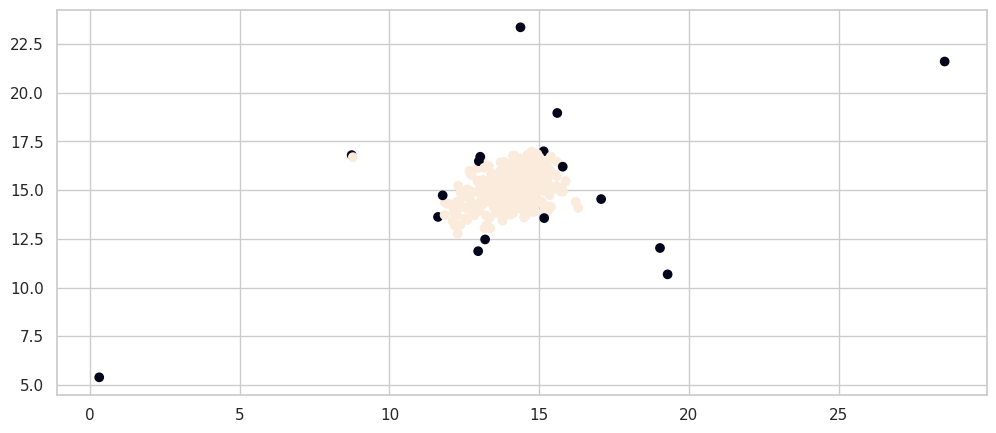

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(df['Latency'],df['Throughput'],
            c=lbs)
plt.show()

# Anomaly Detection using One Class SVM (sophisticated example)

In [ ]:
%reset -f

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [ ]:
# We create a 2D grid from -5 to 5 with 500 points in each direction
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

In [ ]:
# We created 2 random bubles close to (2,-2) as train data....

# Generate train data
n_train_samples=100;
X = 0.3 * np.random.randn(n_train_samples, 2)
X_train = np.r_[X + 2, X - 2]

In [ ]:
# Generate some regular novel observations

n_test_samples=20;
X = 0.3 * np.random.randn(n_test_samples, 2)
X_test = np.r_[X + 2, X - 2]

In [ ]:
# Generate some abnormal novel observations

n_outlier_samples=20;
X_outliers = np.random.uniform(low=-4, high=4, size=(n_outlier_samples, 2))

In [ ]:
# see how it looks

plt.figure(figsize=(12,8));
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    [   "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
#    prop=matplotlib.font_manager.FontProperties(size=11),
)
#plt.xlabel(
#    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
#    % (n_error_train, n_error_test, n_error_outliers)
#)
plt.show()

In [ ]:
# CREATE THE ONE CLASS SVM
# we will train the Support Vector Machine, but with only one class,
# and not including any outlier in the sample base.
# So, the SVM will learn to be close to these samples, and just them.

clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1);
# fit the model
clf.fit(X_train);

In [ ]:
# Predict with the model
# Let's check the output for every sample class (train, test, and outliers)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [ ]:
# Check the errors we are getting

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == -1].size
print('Out of the surface in train: '+ str(n_error_train/n_train_samples*100) + '%')
print('Out of the surface test: '+ str(n_error_test/n_test_samples*100) + '%')
print('Out of the surface outliers: '+ str(n_error_outliers/n_outlier_samples*100) + '%')

Out of the surface in train: 19.0%
Out of the surface test: 5.0%
Out of the surface outliers: 90.0%


In [ ]:
# Let's apply the decsion function to the grid previusoly created
# to get a good view of what is going on over this space.
# plot the line, the points, and the nearest vectors to the plane

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
# Plot the boundaries

plt.title("Novelty Detection")
# plt.imshow(Z)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

In [ ]:
# Plot the training set

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

In [ ]:
# Plot the test set

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

In [ ]:
# Plot the Outliers

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

In [ ]:
# Plot them all


plt.figure(figsize=(19,10))
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
#    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
#    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()

# Fraud detection using SVM and t-SNE dimension reduction

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [14]:
# Split Fraud and Clean

# splitting by class
fraud = df[df.label == 1]
clean = df[df.label == 0]

Data_Fraud_df=fraud.drop(['label'], axis=1)
Data_Clean_df=clean.drop(['label'], axis=1)

# Shuffle the samples before split
Data_Clean_df=Data_Clean_df.sample(frac=1)

# Convert into array
Data_Clean=Data_Clean_df.values
Data_Fraud=Data_Fraud_df.values

In [15]:
# undersample clean transactions

# manual parameter
RATIO_TO_FRAUD = 15

# dropping redundant columns
#df = df.drop(['time', 'amount'], axis=1)

# splitting by class
fraud = df[df.label == 1]
clean = df[df.label == 0]

# undersample clean transactions
clean_undersampled = clean.sample(
    int(len(fraud) * RATIO_TO_FRAUD),
    random_state=RANDOM_SEED
)

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([fraud, clean_undersampled])
column_names = list(visualisation_initial.drop('label', axis=1).columns)

# isolate features from labels
features, labels = visualisation_initial.drop('label', axis=1).values, \
                   visualisation_initial.label.values

In [16]:
print(len(clean_undersampled))
print(len(fraud))

7380
492


In [17]:
# Split Clean into test, val, and train

#n_samples,n_variables=Data_Clean.shape;
train_samples=int(len(clean_undersampled)*.6)
val_samples=int(len(clean_undersampled)*.3)

Data_train=Data_Clean[:train_samples];
Data_val=Data_Clean[train_samples:train_samples+val_samples];
Data_test=Data_Clean[train_samples+val_samples:7380];

In [39]:
print(len(Data_train))
print(len(Data_val))
print(len(Data_test))
print(len(Data_Fraud))

4428
2214
738
492
492


In [19]:
X_train=Data_train
X_val=Data_val
X_test=Data_test
X_outliers = Data_Fraud

The original dataset has 31 features. Now use t-SNE to reduce dimension to 2

In [20]:
from sklearn.manifold import TSNE
# A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely)
# how to balance attention between local and global aspects of your data. The parameter is,
# in a sense, a guess about the number of close neighbors each point has. The perplexity
# value has a complex effect on the resulting pictures.

# tsne = TSNE(n_components=2, perplexity=30)
tsne = TSNE(n_components=2, perplexity=50)
features_embedded = tsne.fit_transform(features)

In [21]:
#
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=features_embedded[np.where(labels==1)][:,0],
                         y=features_embedded[np.where(labels==1)][:,1],
                        mode='markers',
                        name='Fraud'))
fig.add_trace(go.Scatter(x=features_embedded[np.where(labels==0)][:,0],
                         y=features_embedded[np.where(labels==0)][:,1],
                        mode='markers',
                        name='No Fraud'))
fig.show()

Use SVM to work within the latent space

In [ ]:
##### SCRATCH
'''
plt.figure(figsize=(12,8));
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", edgecolors="k")
plt.axis("tight")
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
plt.legend(
    [b1, b2],
    [   "training observations",
        "new regular observations",

    ],
    loc="upper left",
#    prop=matplotlib.font_manager.FontProperties(size=11),
)
#plt.xlabel(
#    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
#    % (n_error_train, n_error_test, n_error_outliers)
#)
plt.show()

In [43]:
clean_train_embedded = features_embedded[:4428,:]
clean_val_embedded = features_embedded[:6642,:]
clean_test_embedded = features_embedded[6643:7380,:]
fraud_embedded = features_embedded[7381:,:]

In [ ]:
'''
plt.figure(figsize=(120,8));

# plot all clean train transcations in latent space
b1 = plt.scatter(clean_train_embedded[:, 0][np.where(labels==0)][:,0],
                 clean_train_embedded[:, 1][np.where(labels==0)][:,1],
                 c="white", edgecolors="k")

b2 = plt.scatter(clean_val_embedded[np.where(labels==0)][:,0],
                 clean_val_embedded[np.where(labels==0)][:,1],
                 c="blueviolet", edgecolors="k")

# plot all fraud transactions
c = plt.scatter(fraud_embedded[np.where(labels==1)][:,0],
                fraud_embedded[np.where(labels==1)][:,1],
                c="gold", edgecolors="k")
plt.axis("tight")
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
plt.legend(
    [b1, b2],
    [   "training observations",
        "new regular observations",

    ],
    loc="upper left",
#    prop=matplotlib.font_manager.FontProperties(size=11),
)
#plt.xlabel(
#    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
#    % (n_error_train, n_error_test, n_error_outliers)
#)
plt.show()
'''

SVM

In [68]:
# CREATE THE ONE CLASS SVM
# we will train the Support Vector Machine, but with only one class,
# and not including any outlier in the sample base.
# So, the SVM will learn to be close to these samples, and just them.

clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1);
# fit the model
clf.fit(clean_train_embedded);

In [69]:
# Predict with the model
# Let's check the output for every sample class (train, test, and outliers)

y_pred_train = clf.predict(clean_train_embedded)
y_pred_test = clf.predict(clean_test_embedded)
y_pred_outliers = clf.predict(fraud_embedded)

In [70]:
# Check the errors we are getting

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == -1].size
print('Out of the surface in train: '+ str(n_error_train/4428*100) + '%')
print('Out of the surface test: '+ str(n_error_test/738*100) + '%')
print('Out of the surface outliers: '+ str(n_error_outliers/492*100) + '%')

Out of the surface in train: 13.911472448057813%
Out of the surface test: 26.151761517615174%
Out of the surface outliers: 27.03252032520325%


In [71]:
# We create a 2D grid from -100 to 100 with 500 points in each direction
xx, yy = np.meshgrid(np.linspace(-100, 100, 500), np.linspace(-100, 100, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

(-100.0, 100.0)

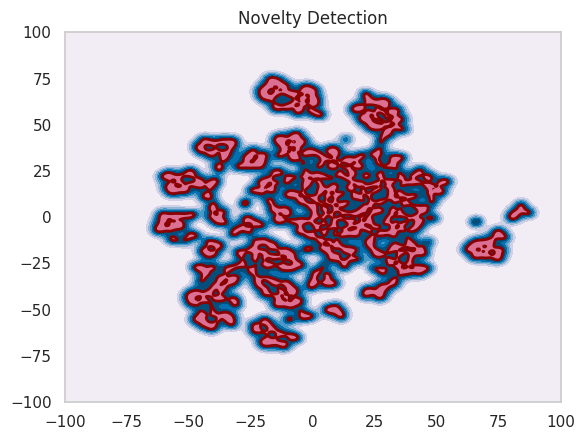

In [72]:
# Plot the boundaries

plt.title("Novelty Detection")
# plt.imshow(Z)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
plt.axis("tight")
plt.xlim((-100, 100))
plt.ylim((-100, 100))

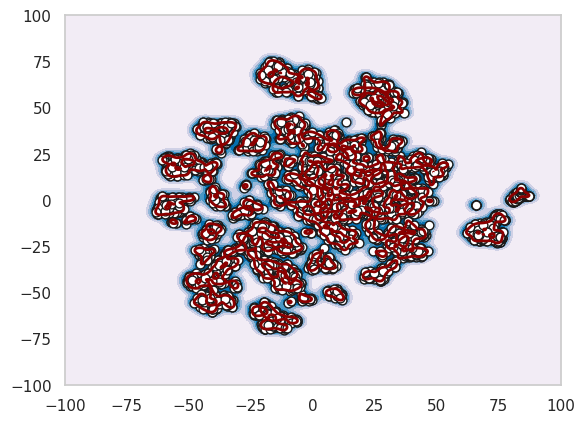

In [74]:
# Plot the training set

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
s = 40
b1 = plt.scatter(clean_train_embedded[:, 0], clean_train_embedded[:, 1], c="white", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.show()

(-100.0, 100.0)

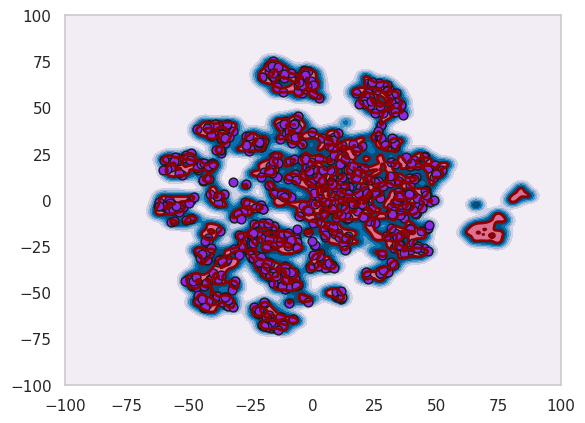

In [76]:
# Plot the test set

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
b2 = plt.scatter(clean_test_embedded[:, 0], clean_test_embedded[:, 1], c="blueviolet", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-100, 100))
plt.ylim((-100, 100))

(-100.0, 100.0)

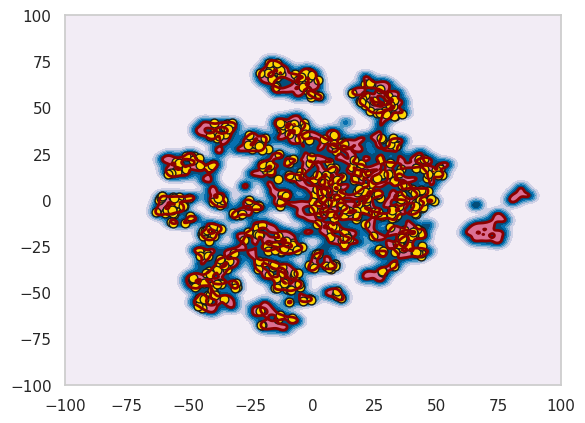

In [77]:
# Plot the Outliers

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
c = plt.scatter(fraud_embedded[:, 0],fraud_embedded[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-100, 100))
plt.ylim((-100, 100))

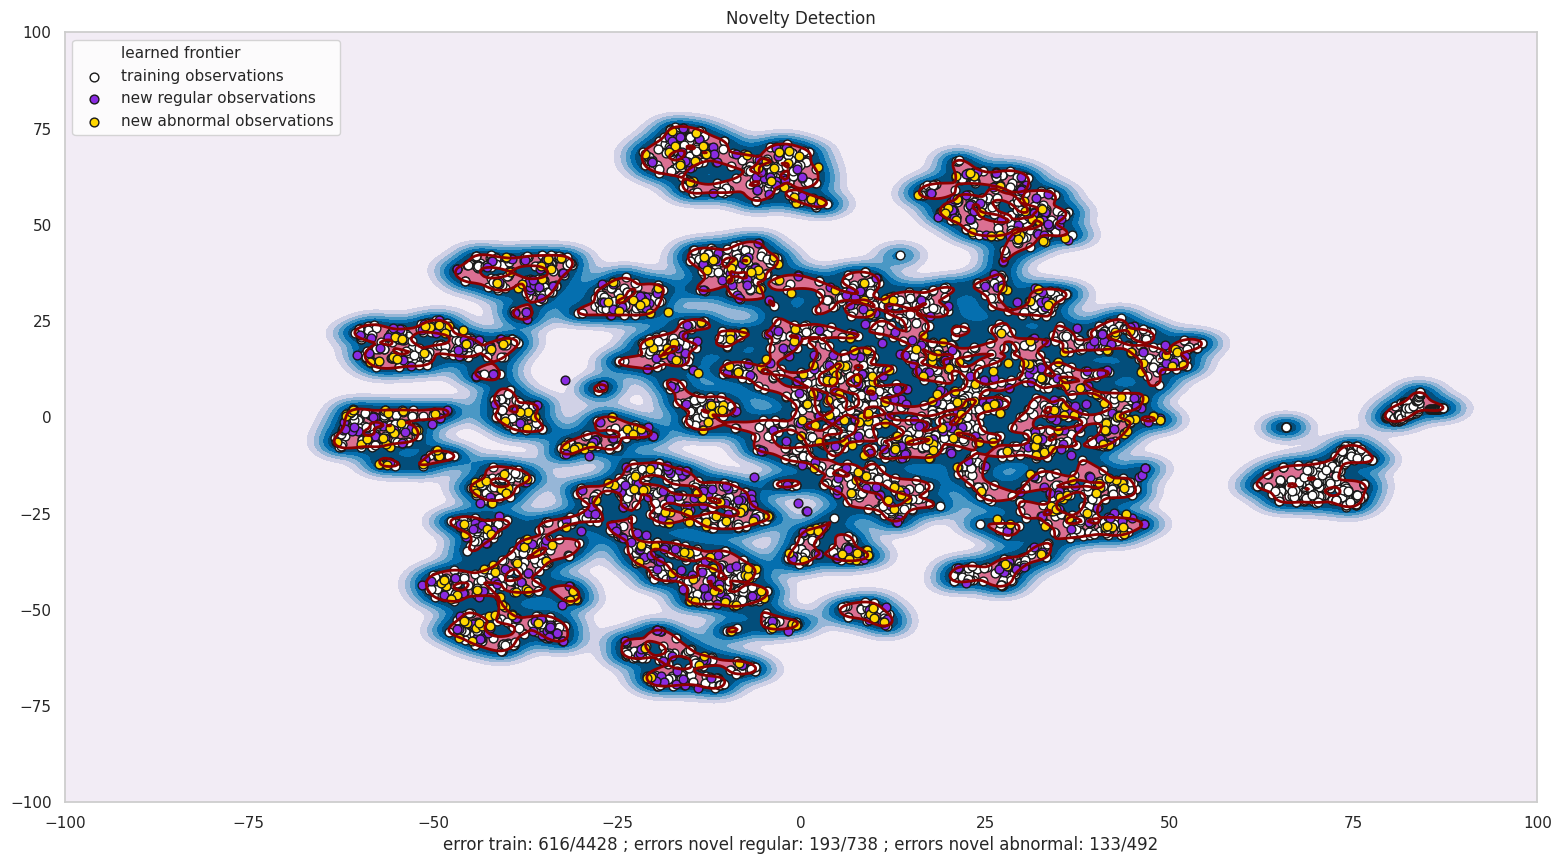

In [82]:
# Plot them all


plt.figure(figsize=(19,10))
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(clean_train_embedded[:, 0], clean_train_embedded[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(clean_test_embedded[:, 0], clean_test_embedded[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(fraud_embedded[:, 0], fraud_embedded[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
#    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/4428 ; errors novel regular: %d/738 ; errors novel abnormal: %d/492"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()